In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_25/U2020 Alarms 3 months before 2024_07_25 11_45pm/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Sort by 'First Occurred On' in descending order (latest alarms first)
df = data.sort_values(by='First Occurred On', ascending=False)

# Convert 'First Occurred On' to datetime, handle errors and fill NaT with a default date
df['First Occurred On'] = pd.to_datetime(df['First Occurred On'], errors='coerce')

# Reference time
reference_time = pd.to_datetime('2024-08-01 08:00:00')

# Calculate the relative day index, handle NaT by filling with a large negative number
df['Relative Day Index'] = ((df['First Occurred On'] - reference_time).dt.total_seconds() // 86400).fillna(-9999).astype(int)

# Adjust the index to set the 08:00 to 08:00 of the next day as 0, and previous days as -1, -2, -3, etc.
df['Relative Day Index'] = df['Relative Day Index'].apply(lambda x: x if x < 0 else x)

# Print the updated dataframe
df.head(50000)



Mounted at /content/drive


<ipython-input-1-668afe4a03b4>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-668afe4a03b4>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-668afe4a03b4>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-668afe4a03b4>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-668afe4a03b4>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-668afe4a03b4>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,EMS Name,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type,Relative Day Index
3780970,U2020ACC,2024-07-25 23:47:21,MLB_CloudUDN01,Major,Service Center and Service Communication Failure,5521,"APP ID=0, Service Name=MbbUfdrFtpDataExposure,...",NaN,2024-07-25 23:48:01,2024-07-25 23:47:21,Cleared,NaN,NaN,HUAWEI,Others,NaN,-7
3780971,U2020ACC,2024-07-25 23:47:19,MC2_Kollupitiya_West_Reloc-CM1975-BDGHP,Minor,RF Unit RX Channel RTWP/RSSI Unbalanced,26522,"Cabinet No.=0, Subrack No.=71, Slot No.=0, Car...",Kollupitiya_West_Reloc,NaN,2024-07-25 23:47:19,Uncleared,NaN,CM1975,HUAWEI,Access,GBTS,-7
3780972,U2020ACC,2024-07-25 23:47:18,MC2_Kilinochchi_South-KI0099-BDGHP,Major,Rectifier Failure Alarm,65083,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Kilinochchi_South,2024-07-25 23:47:58,2024-07-25 23:47:18,Cleared,NaN,KI0099,HUAWEI,Power,GBTS,-7
3780973,U2020ACC,2024-07-25 23:47:18,new MLB FusionStage,Critical,Pod Is Abnormal,120013,"source=CFE, kind=Pod, name=mbbufdrftpdataexpos...",NaN,2024-07-25 23:55:53,2024-07-25 23:47:18,Cleared,NaN,NaN,HUAWEI,Others,NaN,-7
3780974,U2020ACC,2024-07-25 23:47:08,Brandix_Intimate_O_Ind-GM0352-K,Critical,NE Is Disconnected,301,"neName=Brandix_Intimate_O_Ind-GM0352-K, neIP=1...",Brandix_Intimate_Ind,NaN,2024-07-25 23:47:08,Uncleared,NaN,GM0352,HUAWEI,Access,eNodeB,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48595,U2020ACC,2024-07-24 15:56:04,Weboda_South-GM0235-BHOP,Critical,Cell Unavailable,29240,"eNodeB Function Name=Weboda_South-GM0235-BHOP,...",Weboda_South,2024-07-24 15:57:05,2024-07-24 15:56:04,Cleared,NaN,GM0235,HUAWEI,Access,eNodeB,-8
48597,U2020ACC,2024-07-24 15:56:02,MC1_Narahenpita-CM0158-BGHOP,Major,RF Unit Power Surge Protector Fault,26544,"Cabinet No.=0, Subrack No.=82, Slot No.=0, Boa...",Narahenpita,2024-07-24 16:00:51,2024-07-24 15:56:02,Cleared,NaN,CM0158,HUAWEI,Access,GBTS,-8
48598,U2020ACC,2024-07-24 15:56:00,Matara_RT-MR0005-L,Major,User Plane Fault,25954,Service Type=X2,Matara_RT,2024-07-24 17:16:07,2024-07-24 15:56:00,Cleared,NaN,MR0005,HUAWEI,Access,eNodeB,-8
48599,U2020ACC,2024-07-24 15:55:57,U2020ACC,Minor,The Data Transmission Channel Between the Trac...,780,"NE Name=Madiha_West-MR0254-L, NE IP=10.220.189...",NaN,2024-07-25 10:02:12,2024-07-24 15:55:57,Cleared,NaN,NaN,HUAWEI,Others,NaN,-8


In [ ]:
# Filter the data for HUAWEI and Access domain

filtered_data = df[(df['Vendor'] == 'HUAWEI')]

# Retain only the specified columns
columns_to_keep = ['Site ID', 'Alarm Name', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index']
df_filtered = filtered_data[columns_to_keep]

# Encode categorical columns except 'Relative Day Index'
categorical_columns = df_filtered.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
    label_encoders[column] = le

# Print the updated dataframe
df_filtered.head(100)

<ipython-input-3-f39b6d5795a1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-3-f39b6d5795a1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-3-f39b6d5795a1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Site ID,Alarm Name,Vendor,Domain,Device Type,Relative Day Index
3780970,4113,776,0,4,30,-7
3780971,1406,687,0,1,8,-7
3780972,2690,714,0,5,8,-7
3780973,4113,645,0,4,30,-7
3780974,1909,541,0,1,27,-7
...,...,...,...,...,...,...
10,632,496,0,4,16,-7
8,632,517,0,4,16,-7
9,632,495,0,4,16,-7
3781059,4113,645,0,4,30,-7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

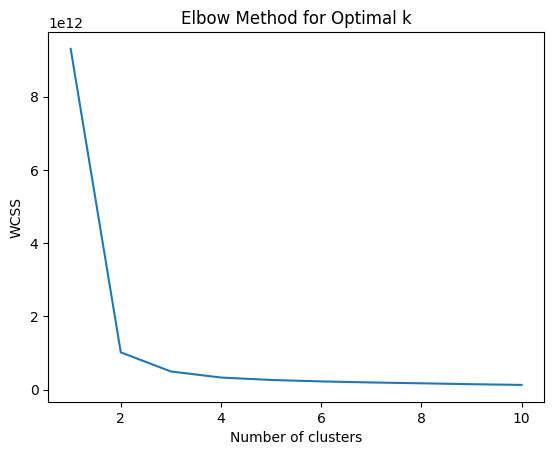

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-4-4f23f7862e5f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['Alarm Name', 'Site ID']])  # Include Site ID in clustering


             Site ID  Alarm Name  Vendor    Domain  Device Type  \
Cluster                                                           
0         735.023312  515.599345     0.0  2.204578    18.935769   
1        4054.414232  600.379306     0.0  3.090823    25.446306   
2        2489.223687  469.134921     0.0  2.057667    21.459850   

         Relative Day Index  
Cluster                      
0                -51.184376  
1                -48.366103  
2                -54.342785  
Cluster
0    1379308
1    1889748
2     531149
dtype: int64


In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_filtered[['Alarm Name', 'Site ID']])  # Include Site ID in clustering
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the optimal number of clusters
optimal_clusters = 3  # For instance, we choose 3 based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['Alarm Name', 'Site ID']])  # Include Site ID in clustering

# Analyze the clusters
print(df_filtered.groupby('Cluster').mean())
print(df_filtered.groupby('Cluster').size())

# Plot the clusters
sns.pairplot(df_filtered, hue='Cluster')
plt.show()

# Inverse transform the scaled columns for interpretation
# scaler = MinMaxScaler()
# df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']] = scaler.inverse_transform(df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']])

# Convert back to original categorical values using label_encoders
for column in label_encoders.keys():
    df_filtered[column] = label_encoders[column].inverse_transform(df_filtered[column].round().astype(int))

# Display sample output of clustered data
print(df_filtered.head(100))

# Re-scale the dataframe for LSTM
scaler = MinMaxScaler()
df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']] = scaler.fit_transform(df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']])

# Prepare the dataset for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
features = df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']].values
X, y = create_dataset(features, time_steps)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], time_steps, X.shape[2])




In [ ]:
# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], time_steps, X.shape[2])

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(X.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=1, batch_size=2048, verbose=1)

# Predict for the next 7 days (each day has 24 hours)
predictions = []
current_batch = features[-time_steps:].reshape((1, time_steps, X.shape[2]))

for i in range(24 * 7):  # 24 hours * 7 days
    pred = model.predict(current_batch)[0]
    predictions.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame for predictions
relative_day_indices = np.arange(df_filtered['Relative Day Index'].max() + 1, df_filtered['Relative Day Index'].max() + 1 + 24 * 7)
pred_df = pd.DataFrame(predictions, columns=['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster'])
pred_df['Relative Day Index'] = relative_day_indices

# Convert back to original categorical values using label_encoders
for column in label_encoders.keys():
    pred_df[column] = pred_df[column].round().astype(int)
    pred_df[column] = label_encoders[column].inverse_transform(pred_df[column])

# Filter predictions to include only the next 7 days
pred_df = pred_df[pred_df['Relative Day Index'].isin(range(1, 8))]

# Display sample output
print(pred_df.head(7))

# Print cluster patterns with predictions
for day_index in pred_df['Relative Day Index'].unique():
    predicted_alarms = pred_df[pred_df['Relative Day Index'] == day_index]
    print(f"\nPredicted Alarms for Relative Day Index {day_index}:")
    for cluster in predicted_alarms['Cluster'].unique():
        cluster_alarms = df_filtered[df_filtered['Cluster'] == cluster]
        alarm_counts = cluster_alarms['Alarm Name'].value_counts()
        print(f"\nCluster {int(cluster)} Alarm Patterns:")
        print(alarm_counts.head(10))

NameError: name 'X' is not defined